Text(0.5, 1.0, 'Distribution of Incubation Period (Exposed) generated for simulation')

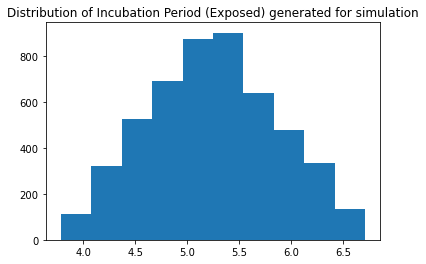

In [41]:
import random
from matplotlib import pyplot as plt

dist = []
for i in range(5000):
    dist.append( random.triangular(3.78,6.78,5.2) )
    
plt.hist(dist)
plt.title('Distribution of Incubation Period (Exposed) generated for simulation')
                            

In [42]:
min(dist), max(dist)

(3.784576549387789, 6.715635222539086)

Text(0.5, 1.0, 'Distribution of Infectious Period (Infected) generated for simulation')

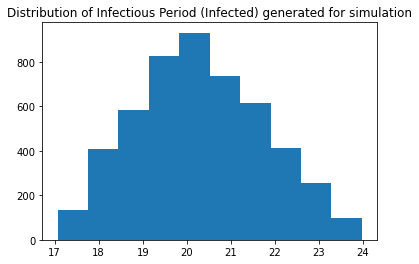

In [39]:
dist = []
for i in range(5000):
    dist.append( random.triangular(17,24,20) )
    
plt.hist(dist)
plt.title('Distribution of Infectious Period (Infected) generated for simulation')

In [40]:
min(dist), max(dist)

(17.06466559867615, 23.974150657588844)

In [9]:
from model import Covid

def getInfected(model):
    return model.cuminfected

def getDays(model):
    return model.schedule.steps/model.day_steps

def getStats(model):
    return model.stats

model_params = {
    "height": 200,
    "width": 200,
    "density": 5000,
    "infection_rate": 0.7,
    "min_infected": 7,
    "max_infected": 14,
    "min_exposed": 1,
    "max_exposed": 5,
    "day_steps": 5,
    "minority_pc": 3,
    "day_isolation": 7,
    "detection_rate": 0.7
}

model = Covid(height=model_params['height'], width=model_params['width'], density=model_params['density'], 
              minority_pc=model_params['minority_pc'], infection_rate=model_params['infection_rate'], 
              detection_rate=model_params['detection_rate'], 
              min_infected=model_params['min_infected'], max_infected=model_params['max_infected'], 
              min_exposed=model_params['min_exposed'], max_exposed=model_params['max_exposed'],
              day_steps=model_params['day_steps'], day_isolation=model_params['day_isolation']
              )
for i in range(1000):
    if i%100==0:
        print(i)
        
    model.step()


0
100
200
300
400
500
600
700
800
900


In [10]:
df = model.datacollector.get_model_vars_dataframe()
df

,contact,infected,cuminfected,exposed,susceptible,removed,isolated,stats
0,0.0582,3,0,0,4997,0,0,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
1,0.1618,3,0,0,4997,0,0,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
2,0.2686,3,1,1,4996,0,0,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
3,0.3672,3,2,2,4995,0,0,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
4,0.4644,3,2,2,4995,0,0,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
...,...,...,...,...,...,...,...,...
995,49.1074,102,4079,16,918,3964,2710,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
996,49.1196,103,4080,14,917,3966,2713,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
997,49.1334,99,4082,16,915,3970,2714,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
998,49.1484,96,4084,18,913,3973,2715,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."


In [11]:
df = model.datacollector.get_model_vars_dataframe()
df['%'] = 100*(df['cuminfected']+model_params['minority_pc'])/model_params['density']
df

,contact,infected,cuminfected,exposed,susceptible,removed,isolated,stats,%
0,0.0582,3,0,0,4997,0,0,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...",0.06
1,0.1618,3,0,0,4997,0,0,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...",0.06
2,0.2686,3,1,1,4996,0,0,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...",0.08
3,0.3672,3,2,2,4995,0,0,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...",0.10
4,0.4644,3,2,2,4995,0,0,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...",0.10
...,...,...,...,...,...,...,...,...,...
995,49.1074,102,4079,16,918,3964,2710,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...",81.64
996,49.1196,103,4080,14,917,3966,2713,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...",81.66
997,49.1334,99,4082,16,915,3970,2714,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...",81.70
998,49.1484,96,4084,18,913,3973,2715,"{'infected': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...",81.74


In [ ]:
from model import Covid
from mesa.batchrunner import BatchRunner

def getInfected(model):
    return model.cuminfected

def getDays(model):
    return model.schedule.steps/model.day_steps

def getStats(model):
    return model.stats

# comm params
comm_model_params = {
    #"height": 600,
    #"width": 600,
    "density": 50000,
    "infection_rate": 0.7,
    "min_infected": 7,
    "max_infected": 14,
    "min_exposed": 3.78,
    "max_exposed": 6.78,
    "day_steps": 5,
    "minority_pc": 2,
    "day_isolation": 7,
    "detection_rate": 0.7
}
comm_variable_params = {
    #"infection_rate": [0.3, 0.5, 0.7, 0.9],
    #"detection_rate": [0.3, 0.5, 0.7, 0.9],
    #"day_isolation": [3, 5, 7, 9, 11, 13, 15]
    "height": [220, 240, 260, 280],
    "width": [280, 300, 320]
}

# dorm params
dorm_model_params = {
    #"height": 600,
    #"width": 600,
    "density": 5000,
    "infection_rate": 0.7,
    "min_infected": 7,
    "max_infected": 14,
    "min_exposed": 3.78,
    "max_exposed": 6.78,
    "day_steps": 5,
    "minority_pc": 3,
    "day_isolation": 7,
    "detection_rate": 0.7
}
dorm_variable_params = {
    #"infection_rate": [0.3, 0.5, 0.7, 0.9],
    #"detection_rate": [0.3, 0.5, 0.7, 0.9],
    #"day_isolation": [3, 5, 7, 9, 11, 13, 15]
    "height": [220, 240, 260, 280],
    "width": [280, 300, 320]
}

# assign active params
model_params = dorm_model_params
variable_params = dorm_variable_params

batch_run = BatchRunner(Covid, variable_params, model_params, iterations=5, max_steps=2000, 
                        model_reporters={"infected": getInfected, "days":getDays, "stats":getStats})
batch_run.run_all()

data = batch_run.get_model_vars_dataframe()
#data['total_infected'] = data['infected']+data['minority_pc']
#mdata = data.groupby(['minority_pc','day_isolation']).mean()



2it [11:15, 297.14s/it]

In [2]:
data['total_infected'] = data['infected']+data['minority_pc']
data['%'] = 100*data['total_infected']/model_params['density']
sdata = data[["height", "width", "days", "total_infected", "%"]]
sdata.groupby(['height','width']).mean()

NameError: name 'data' is not defined

In [27]:
sdata

,height,width,days,total_infected,%
0,220,230,100.0,1092,21.84
1,220,230,100.0,469,9.38
2,220,230,100.0,593,11.86
3,220,230,100.0,738,14.76
4,220,230,100.0,1009,20.18
5,220,240,100.0,566,11.32
6,220,240,100.0,305,6.10
7,220,240,100.0,219,4.38
8,220,240,100.0,252,5.04
9,220,240,100.0,578,11.56


In [ ]:
data.to_csv("results.csv", index=False)

In [ ]:
dtable = data[['detection_rate', 'day_isolation','infection_rate','days', 'total_infected','%', ]].groupby(['infection_rate','detection_rate', 'day_isolation']).median()
dtable


In [ ]:
days = []
for i in range(20):
    days.append(len(data['stats'][i]['infected'])/5)
days

In [ ]:
from matplotlib import pyplot as plt
plt.plot(data['stats'][10]['infected'],label="infected")

plt.plot(data['stats'][10]['isolated'],label="isolated")
plt.plot(data['stats'][10]['susceptible'],label="susceptible")
plt.plot(data['stats'][10]['removed'],label="removed")
plt.plot(data['stats'][10]['exposed'],label="exposed")
plt.legend()


In [ ]:
counts

In [ ]:
growth

In [ ]:
counts = data['stats'][10]['infected']
prevct = 0

growth = []
for i in counts:
    if prevct==0:
        gr = None
    else:
        gr = ((i-prevct)/prevct)*100
    growth.append(gr)
    prevct = i

plt.plot(growth[:-2])

In [ ]:
import numpy as np
np.mean([x for x in growth if x is not None])

In [ ]:
plt.plot(counts)

In [ ]:
med = data[['infection_rate', 'days', 'total_infected']].groupby('infection_rate').median()
med

In [ ]:
data['%'] = data['total_infected']/6
data[['days', 'total_infected','%']]

In [ ]:
plt.scatter(med.index, med.days)
plt.xlabel("infection_rate")
plt.ylabel("days")
plt.title("Impact of infection rate on number of days of sustained infection")
plt.show()

In [ ]:
plt.scatter(med.index, med.total_infected)
plt.xlabel("infection_rate")
plt.ylabel("total_infection")
plt.title("Impact of infection rate on total number of infections")
plt.show()

In [ ]:
stats1 = data[data.infection_rate==0.1]
stats2 = data[data.infection_rate==0.3]
stats3 = data[data.infection_rate==0.5]
stats4 = data[data.infection_rate==0.7]

In [ ]:
plt.boxplot([stats1.total_infected, stats2.total_infected, stats3.total_infected, stats4.total_infected])
plt.show()

In [ ]:
plt.boxplot([stats1.days, stats2.days, stats3.days, stats4.days])
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(stats.total_infected/stats.days,stats.days)
plt.xlabel('total_infected/day')
plt.ylabel('days')
plt.show()`

In [21]:
from model import Covid
from mesa.batchrunner import BatchRunner
import time

def getInfected(model):
    return model.cuminfected

def getDays(model):
    return model.schedule.steps/model.day_steps

def getStats(model):
    return model.stats

# dorm params
dorm_model_params = {

    #"width": 500,
    "density": 9000, #1000, 4000, 9000, 16000, 25000


    "minority_pc": 5,
    "infection_rate": 0.7,

    "min_infected": 17,
    "max_infected": 24,
    "mean_infected": 20,
    "min_exposed": 3.78,
    "max_exposed": 6.78,
    "mean_exposed": 5.2,
    
    "day_steps": 5,
    "day_isolation": 5,
    "detection_rate": 0.7
}
dorm_variable_params = {
   #"day_steps": [3, 4, 7, 10] # community
   #"infection_rate": [0.3, 0.7] # dormitory/community - masking
   #"day_isolation": [2,4,6,8,10] # dormitory - contact tracing
    "width": [300]
    #"density": [5000]
}

# assign active params
model_params = dorm_model_params
variable_params = dorm_variable_params

batch_run = BatchRunner(Covid, variable_params, model_params, iterations=5, max_steps=200*5, 
                        model_reporters={"infected": getInfected, "days":getDays, "stats":getStats})
batch_run.run_all()
data = batch_run.get_model_vars_dataframe()

data['total_infected'] = data['infected']+data['minority_pc']
data['%'] = 100*data['total_infected']/dorm_model_params['density']
data.to_csv("density_01_300%d.csv"%int(time.time()), index=False)


5it [08:03, 96.77s/it] 


In [5]:
data['total_infected'] = data['infected']+data['minority_pc']
data['%'] = 100*data['total_infected']/dorm_model_params['density']
data.to_csv("density_005_12500%d.csv"%int(time.time()), index=False)

#
#sdata = data[["minority_pc", "width", "days", "total_infected", "%"]]
#sdata = sdata.groupby(['minority_pc', 'width']).mean()
#sdata.to_csv("width_grouped_%d.csv"%int(time.time()), index=True)

In [39]:
data

,day_steps,Run,days,infected,stats,width,density,minority_pc,infection_rate,min_infected,max_infected,mean_infected,min_exposed,max_exposed,mean_exposed,day_isolation,detection_rate
0,3,0,22.333333,0,"{'infected': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...",500,5000,5,0.3,17,24,20,3.78,6.78,5.2,5,0.7
1,3,1,58.333333,7,"{'infected': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...",500,5000,5,0.3,17,24,20,3.78,6.78,5.2,5,0.7
2,3,2,36.333333,2,"{'infected': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...",500,5000,5,0.3,17,24,20,3.78,6.78,5.2,5,0.7
3,3,3,63.000000,4,"{'infected': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...",500,5000,5,0.3,17,24,20,3.78,6.78,5.2,5,0.7
4,3,4,22.333333,0,"{'infected': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...",500,5000,5,0.3,17,24,20,3.78,6.78,5.2,5,0.7
5,4,5,43.500000,2,"{'infected': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...",500,5000,5,0.3,17,24,20,3.78,6.78,5.2,5,0.7
6,4,6,72.000000,8,"{'infected': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...",500,5000,5,0.3,17,24,20,3.78,6.78,5.2,5,0.7
7,4,7,43.500000,2,"{'infected': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...",500,5000,5,0.3,17,24,20,3.78,6.78,5.2,5,0.7
8,4,8,21.500000,0,"{'infected': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...",500,5000,5,0.3,17,24,20,3.78,6.78,5.2,5,0.7
9,4,9,46.000000,1,"{'infected': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...",500,5000,5,0.3,17,24,20,3.78,6.78,5.2,5,0.7
